#Proyecto Semestral: Hito 1

##CC5206 Semestre de Primavera 2020

Alumnos: Joaquin Cruz, Ignacio Dassori, Pablo Muñoz, Catalina Paz, Cristóbal Torres

Profesores: Felipe Bravo, Hernán Sarmiento

Fecha de entrega: 16 de octubre de 2020

## Introducción

 Estados Unidos se encuentra dentro de los países con mayor tasa de muertes por mano de la policía al año. En comparación con el resto de países que encabezan la lista, el resto todos presentan o bien conflictos internos (Venezuela y Siria) o políticas severas con respecto al uso de fuerza letal en contra de criminales (Brasil y las Filipinas). Resulta entonces interesante analizar el perfil de las víctimas en los Estados Unidos. Poder ver también si influyen las características que se pueden notar a simple vista en el desenlace de la situación, como si la víctima está armada, si intenta darse a la fuga, la raza a la que pertenece o su género, junto a alguna correlación entre los atributos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv")

## Limpieza de Datos

Primero es importante ver la cantidad de datos que trae el dataset y además revisar cuántos valores nulos (NaN) hay en este mismo.

In [ ]:
print("Cantidad de Datos: ", len(data), "\n")
print("Cantidad de nulos por atributo: ")
data.isnull().sum()

Cantidad de Datos:  5673 

Cantidad de nulos por atributo: 


id                           0
name                       209
date                         0
manner_of_death              0
armed                      212
age                        253
gender                       1
race                       590
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       283
body_camera                  0
longitude                  275
latitude                   275
is_geocoding_exact           0
dtype: int64

El atributo de raza posee la mayor cantidad de nulos, sin embargo solo logra ser el 10% de la cantidad total de datos, de modo que es razonable la idea de eliminar los datos que poseen nulos. Además los atributos ID y nombre no son relevantes en el análisis e interpretación de datos que se llevará a cabo, de modo que ambas columnas se pueden eliminar.

In [ ]:
tamanho_inicial = len(data)
data = data.drop(["id","name","is_geocoding_exact"],axis=1)
data = data.dropna()
tamanho_final = len(data)

print("Tamaño pre procesado: ",tamanho_inicial,"\nTamaño post procesado: ", tamanho_final,"\n")
print("Diferencia: ",tamanho_inicial-tamanho_final)
print("Porcentaje eliminado: ",(int(100-((tamanho_final*100)/tamanho_inicial))),'%')

Tamaño pre procesado:  5680 
Tamaño post procesado:  4376 

Diferencia:  1304
Porcentaje eliminado:  22 %


Si bien se descartó casi un 22% de los datos totales, se sigue contando con un volumen de datos razonablemente grande para realizar análisis

In [ ]:
data.head(4)

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763


Aqui se tiene una vision preliminar de los datos que se trabajarán, son 4371 datos con 14 atributos: 


* date(año-mes-dia)

* manner_of_death(categoric)

* armed(categoric)

* age(int)

* gender(categoric)

* race(categoric)

* city(categoric)

* state(categoric)

* threat_level(categoric)

* flee(categoric)

* body_camera(boolean)

* longitude(float)

* latitude(float)

# Análisis de datos

En la siguiente sección se presentan distintos gráficos generados a partir de los datos tras su limpieza. En base a estos se realiza una exploración inicial de la distribución de los datos en base a sus atributos. 

Cantidad de Datos:  4371 



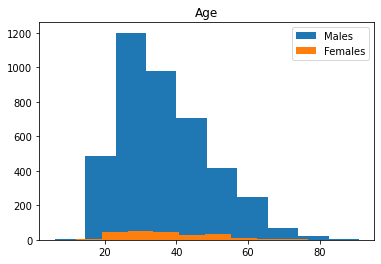

Media:  36.6
Desviación:  12.77
Mediana:  34.0
Moda:  31.0


In [ ]:
print("Cantidad de Datos: ",len(data),'\n')
datos = data

males = datos[datos['gender'] == 'M']
females = datos[datos['gender'] == 'F']


age = datos['age']
plt.hist(males['age'], label="Males")
plt.hist(females['age'], label="Females")
plt.legend()
plt.title("Age")
plt.show()

print("Media: ",round(age.mean(), 2))
print("Desviación: ", round(age.std(), 2))
print("Mediana: ",age.median())
print("Moda: ",age.mode()[0])


El gráfico de edad nos muestra que hay una gran diferencia entre la cantidad de mujeres y hombres en el dataset, además se observa que hay un gran incremento en la cantidad de personas involucradas en disparos policiales a partir de los 23-24 años aprox para el caso de los hombres, siendo este el punto de mayor concentración de los datos para luego ir descendiendo a medida que crece la edad.
En el caso de las mujeres la cantidad de datos se mantiene bastante estable en el rango de edad de 20-40 años, para luego ir descendiendo a medida que crece la edad

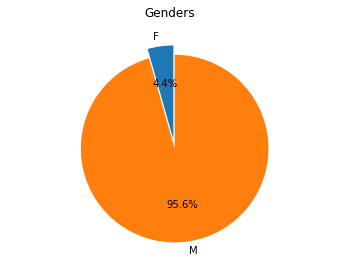

In [ ]:
gender = datos.groupby('gender').size()
gender = gender.to_dict()


labels = gender.keys()
total = 0
for p in gender.values():
  total+=p
porcentajes = []
for p in gender.values():
  porcentajes.append(p/total)
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
fig1.suptitle('Genders')
ax1.pie(porcentajes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

En el grafo se observa con mayor claridad la gran diferencia entre las víctimas hombres y mujeres. Esto podría deberse a una sobrerrepresentación de hombres en el dataset, pero dada la gran cantidad y origen de los datos es razonable concluir que este no es el caso.

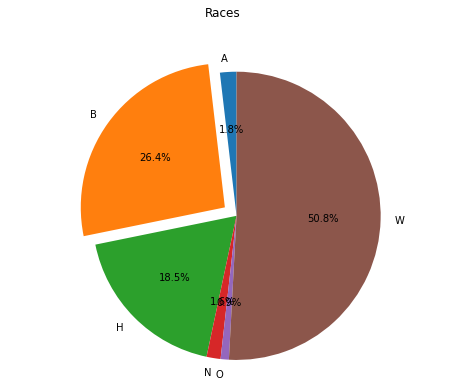

In [23]:
race = datos.groupby('race').size()
race = race.to_dict()


labels = race.keys()
total = 0
for p in race.values():
  total+=p
porcentajes = []
for p in race.values():
  porcentajes.append(p/total)
explode = (0, 0.1,0,0,0,0)  

fig1, ax1 = plt.subplots(figsize=(8,6))
fig1.suptitle('Races')
ax1.pie(porcentajes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  
plt.show()

Las etiquetas corresponden a las razas de las personas que fueron disparadas por la policia, siendo

W: White, non-Hispanic

B: Black, non-Hispanic

A: Asian

N: Native American

H: Hispanic

O: Other

Se observa que en la mayoría de los casos las personas disparadas son de raza W, seguido de B y H, mientras tanto las otras razas tienen representación considerablemente menor con respecto a las otras en los datos

Text(0.5, 0.98, 'Manner of death')

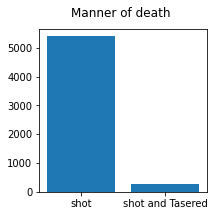

In [ ]:
manner_of_death = datos.groupby('manner_of_death').size()
manner_of_death = manner_of_death.to_dict()

fig, axs = plt.subplots(1, 1, figsize=(3, 3), sharey=True)
axs.bar(manner_of_death.keys(),manner_of_death.values())
fig.suptitle('Manner of death')


La manera en que las víctimas murieron fueron mayoritariamente sólo por disparos de armas de fuego, pero también hubo una cantidad no despreciable de personas que murieron por causa de disparos y arma de electrochoque.

Text(0.5, 0.98, 'State where the shot happened')

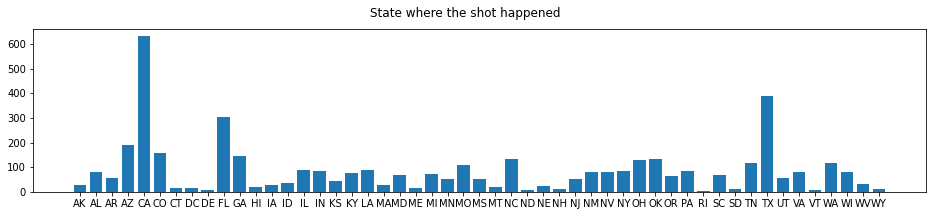

In [ ]:
state = datos.groupby('state').size()
state = state.to_dict()

fig, axs = plt.subplots(1, 1, figsize=(16, 3), sharey=True)
axs.bar(state.keys(),state.values())
fig.suptitle('State where the shot happened')

Las etiquetas corresponden a la abreviacion de dos letras del codigo postal de cada estado, este gráfico muestra donde ocurrieron los disparos de la policia,
siendo CA=California y Tx=Texas los estados donde ocurren más muertes por disparos de policias

Text(0.5, 0.98, 'fleeing attempt')

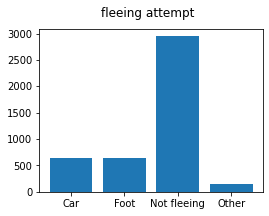

In [ ]:
flee = datos.groupby('flee').size()
flee = flee.to_dict()

fig, axs = plt.subplots(1, 1, figsize=(4, 3), sharey=True)
axs.bar(flee.keys(),flee.values())
fig.suptitle('Fleeing attempt')

Este grafico muestra si hubo un intento de escapar por parte de la persona de la policia, y de ser asi que medio uso para esto, se observa que la mayoría de las personas no intento escapar al momento del encuentro con la policia y que los restantes escaparon mayoritariamente por auto o a pie.

Text(0.5, 0.98, 'threat_level')

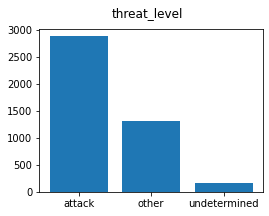

In [ ]:
threat_level= datos.groupby('Threat level').size()
threat_level = threat_level.to_dict()

fig, axs = plt.subplots(1, 1, figsize=(4, 3), sharey=True)
axs.bar(threat_level.keys(),threat_level.values())
fig.suptitle('Threat level')

El grafo muestra el nivel de amenaza presentado por la víctima. En la mayoría de los casos este fue calificado como "ataque", seguido de "otro" y por último una pequeña cantidad no determinada.

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

import plotly.express as px

fig = px.choropleth(df, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

TypeError: ignored

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
   counties = json.load(response)

%pip install -U plotly
import plotly.express as px

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.11.0)


In [ ]:
# Generar FIPS a partir de latitud y longitud:

import requests
import urllib
def latitude_longitude_to_FIPS(latitude, longitude):
  #Encode parameters
  params = urllib.parse.urlencode({'latitude': latitude, 'longitude':longitude, 'format':'json'})
  
  #Contruct request URL
  url = 'https://geo.fcc.gov/api/census/block/find?' + params

  #Get response from API
  response = requests.get(url)

  #Parse json in response
  auxdata = response.json()

  #Return FIPS code
  return auxdata['County']['FIPS']

data_FIPS = data.apply (lambda row: latitude_longitude_to_FIPS(row['latitude'], row['longitude']), axis=1)
data['FIPS']=data_FIPS

# Preguntas y Problemas:

A partir de la motivación original y la exploración del dataset presentada anteriormente, se formulan las siguientes preguntas que tratarán de ser respondidas mediante la minería de datos:

* ¿Cuales son los factores que influyen para que una persona sea disparada por la policía?

* ¿Cuáles son los factores que consideran los policías para dispararle a una persona si no está armada?

* ¿Existe algún factor que incide en si una persona es disparada además del nivel de amenaza?

* ¿Existe alguna relación que permita predecir el nivel de amenaza de una persona en encuentros policiales?

* ¿Existe alguna relación geográfica entre la raza de las víctimas y las circunstancias de sus muertes?

* ¿Presenta la gente joven un comportamiento más agresivo al ser confrontados por un policía armado?

